# Week 1: Iris Dataset Classification with Keras

### 1. Introduction & Objectives

In this notebook, we will use the Iris dataset to classify the species of iris flowers. 

Our objective for this notebook is to build a multiclass classifier with Keras, that takes the four numerical features of the iris samples as inputs and outputs the prediction for the species of the iris flowers. The classifier will include the input layer, one hidden layer, and the output layer. We will use the softmax activation function in the output layer and the categorical crossentropy loss function to train the model.


In this project, we will use the Iris dataset, which is available as a raw data file from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). This dataset consists of 150 samples of iris flowers, each with four numerical features: **sepal length**, **sepal width**, **petal length**, and **petal width**. The target label specifies the **species** of each iris flower.

For model training and evaluation, we will divide the dataset as follows:

- **Training set**: 80% of the total samples (120 samples)
- **Validation set**: 10% of the training samples (12 samples from the training data)
- **Test set**: 20% of the total samples (30 samples)

To ensure an even distribution across the training, validation, and test sets, we will shuffle the data randomly before splitting. This setup provides sufficient data for training and allows us to evaluate the model's performance on separate validation and test sets.

#### 2.1 Importing Required Libraries and Loading the Dataset

First, we'll suppress TensorFlow warnings to keep the output clean and explicitly set the Keras backend to TensorFlow for consistency. Optionally, you can disable GPU usage by uncommenting the line that sets `CUDA_VISIBLE_DEVICES` to -1, which forces TensorFlow to run computations on the CPU.

In [1]:
# Disabling the tensoflow warnings and setting the keras backend to tensorflow
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['KERAS_BACKEND'] = 'tensorflow'

# Optional line to disable GPU usage for this notebook
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Next, we'll import the necessary libraries for data manipulation, numerical operations, and model building.

In [13]:
# Importing the required libraries
import pandas as pd
import numpy as np
from keras import Input, Model
from keras.src.layers import Dense
from keras.src.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

To load the Iris dataset, we'll use `pandas` to read the data directly from the UCI Machine Learning Repository. We'll assign column names to identify the features: sepal length, sepal width, petal length, petal width, and the species label.

In [3]:
# Loading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(url, names=column_names)

The dataset has been successfully loaded into a DataFrame. Let's take a look at the first few rows to understand the structure of the data.

In [4]:
# Displaying the first few rows of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The dataset contains five columns: **sepal_length**, **sepal_width**, **petal_length**, **petal_width**, and **species**. The **species** column represents the target label for each sample, indicating the species of the iris flower. We can move onto the next step of preprocessing the data for training the model.

#### 2.2 Preprocessing the Data

Before training the model, we need to preprocess the data to ensure that it is suitable for training. In this step, we will perform the following preprocessing steps:

    Randomly shuffle the data to ensure an even distribution across the training, validation, and test sets.
    Split the features and target labels into separate variables.
    One-hot encode the target labels to convert them into a binary matrix representation.
    Split the data into training, validation, and test sets.
    
To shuffle the data, we will use `random.shuffle()` from the `numpy` library. This function will shuffle the indices of the samples in the dataset, allowing us to split the data randomly.

In [5]:
# Shuffling the data
np.random.seed(0)
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa


The data has been successfully shuffled. Next, we will split the features and target labels into separate variables and one-hot encode the target labels.

In [6]:
# Split the features and target labels
features = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = dataset['species']

# One-hot encode the target labels
target = pd.get_dummies(target).astype(int)

The features have been separated from the target labels, and the target labels have been one-hot encoded. We can now split the data into training and testing sets.

In [7]:
# Define the split ratio (80% training, 20% testing)
split = 0.8

# Split the feature labels into training and testing sets
split_index = int(split * len(dataset))
train_data, test_data = features[:split_index], features[split_index:]

# Split the target labels into training and testing sets
train_target, test_target = target[:split_index], target[split_index:]

The data has now been successfully split into training and testing sets. We can check the shape of the training and testing sets to ensure that the data has been split correctly.

In [8]:
# Display the shape of the training and testing sets
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((120, 4), (120, 3), (30, 4), (30, 3))

The training and testing sets contain 120 and 30 samples, respectively. We can now proceed to creating the model and fitting it to the training data.

### 3. Creating the Model

To build the neural network model, we will use the Keras functional API. The model will consist of the following layers:
    
        Input layer: Accepts the four numerical features of the iris samples.
        Hidden layer: Contains 8 neurons and uses the ReLU activation function.
        Output layer: Contains 3 neurons (one for each species) and uses the softmax activation function.

In [9]:
# Define the input layer
inputs = Input(shape=(4,), name='input')

# Define the hidden layer
hidden = Dense(8, activation='relu', name='hidden')(inputs)

# Define the output layer
outputs = Dense(3, activation='softmax', name='output')(hidden)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Display the model summary
model.summary()

I0000 00:00:1730036903.950779     585 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730036904.171313     585 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730036904.171426     585 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730036904.223203     585 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730036904.223406     585 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

The model has been successfully created with the input, hidden, and output layers. The model summary provides information about the layers, including the number of parameters in each layer. We can now proceed to compiling and fitting the model to the training data.

### 4. Compiling and Fitting the Model

Before training the model, we need to compile it by specifying the optimizer, loss function, and evaluation metric. In this case, we will use the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric. 

We will implement a callback to save the best model based on the validation loss during training. This callback will help us avoid overfitting by saving the model with the lowest validation loss.

During the training, we will also save the best model based on the validation loss using the `ModelCheckpoint` callback.

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ModelCheckpoint callback
callbacks = [ModelCheckpoint(filepath='../Models/iris_model.keras', monitor='val_loss', save_best_only=True)]

# Fit the model to the training data
history = model.fit(train_data, train_target, epochs=100, batch_size=8, validation_split=0.1, callbacks=callbacks)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8584 - loss: 0.3822 - val_accuracy: 0.9167 - val_loss: 0.3711
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8459 - loss: 0.3853 - val_accuracy: 0.9167 - val_loss: 0.3599
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9092 - loss: 0.3559 - val_accuracy: 0.9167 - val_loss: 0.3585
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.3684 - val_accuracy: 1.0000 - val_loss: 0.3469
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ -1s -40449us/step - accuracy: 0.9425 - loss: 0.3137 - val_accuracy: 0.9167 - val_loss: 0.3466
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8889 - loss: 0.3675 - val_accuracy: 1.0000 - val_loss: 0.3385
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9110 - loss: 0.3565 - val_accuracy: 1.0000 - val_loss: 0.3322
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9520 - loss: 0.3318 - val_accuracy: 0.9

The model was compiled with the **Adam optimizer** and **categorical crossentropy loss**, then trained for **100 epochs** with a **batch size of 8**, using **10% of the training data for validation**. Training accuracy improved from **85.8%** to **96.8%**, while validation accuracy reached **100%** early and remained stable. Both training and validation losses showed consistent decreases, indicating effective learning without significant overfitting. The **ModelCheckpoint callback** saved the best model based on the lowest validation loss. Now we can move onto evaluation the model, and displaying training and validation accuracy and loss over epochs.


### 5. Evaluating the Model

Now that the model is fitted and trained, we can proceed to evaluate its performance on the test data. We will use the test data to make predictions and calculate the accuracy of the model on unseen data. Additionally, we will visualize the training and validation accuracy and loss over epochs to understand the model's learning process.

#### 5.1 Visualizing Training and Validation Metrics

We will plot the training and validation accuracy and loss over epochs to visualize the model's learning process. This visualization will help us understand how the model's performance changes during training and identify any potential issues such as overfitting or underfitting.

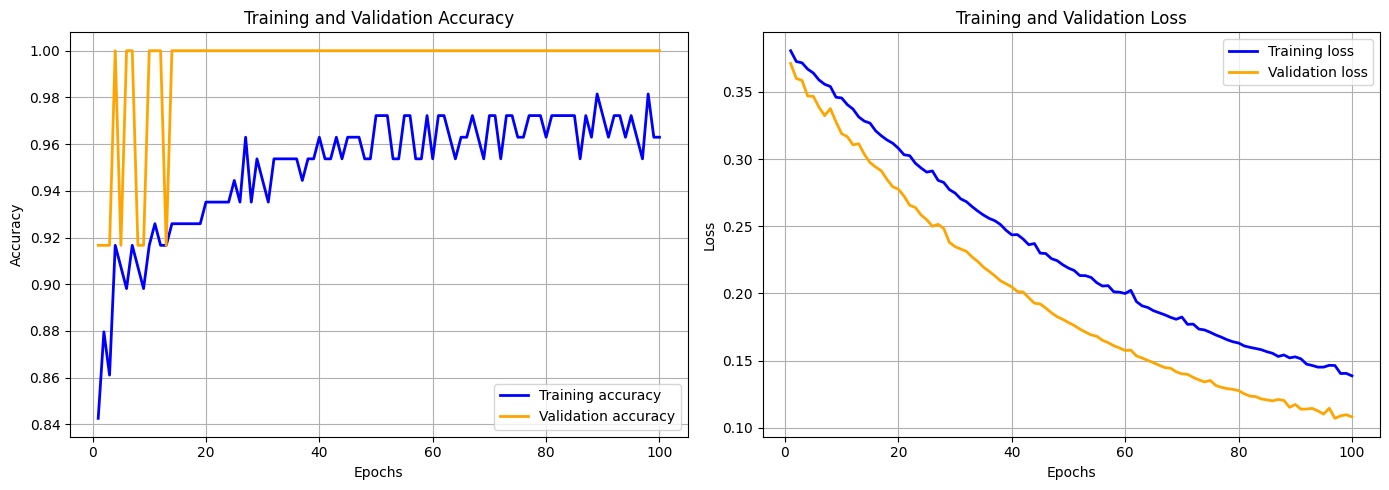

In [18]:
# Extracting data from history
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy on the first subplot (left) with blue and orange colors
ax1.plot(epochs, accuracy, linestyle="-", label="Training accuracy", markersize=8, linewidth=2, color="blue")
ax1.plot(epochs, val_accuracy, linestyle="-", label="Validation accuracy", linewidth=2, color="orange")
ax1.set_title("Training and Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()
ax1.grid(True)

# Plot loss on the second subplot (right) with blue and orange colors
ax2.plot(epochs, loss, linestyle="-", label="Training loss", markersize=8, linewidth=2, color="blue")
ax2.plot(epochs, val_loss, linestyle="-", label="Validation loss", linewidth=2, color="orange")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

The training and validation accuracy plots indicate that the model achieved steady improvement, reaching **96.8%** accuracy on the training set and **100%** accuracy on the validation set, demonstrating strong generalization. The loss curves show a consistent downward trend throughout the epochs, suggesting that the model effectively minimized errors during training. Overall, the stable performance on both training and validation sets indicates successful learning without signs of overfitting or underfitting.

Next, we will evaluate the model's performance on the test data to determine its accuracy on unseen samples.

#### 5.2 Evaluating the Model on Test Data

We will evaluate the model's performance on the test data by making predictions and calculating the accuracy of the model on unseen samples. We will use the test data to make predictions and compare them with the actual target labels to determine the model's accuracy.

In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_target)

# Display the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - accuracy: 0.9667 - loss: 0.1195
Test Accuracy: 96.67%


The model achieved an accuracy of **96.67%** on the test data, indicating that it performed well on unseen samples. This high accuracy on the test data confirms that the model generalized effectively to new iris samples, demonstrating its robustness and reliability.

### 6. Summary and Conclusion

In this notebook, we built a multiclass classifier with Keras to classify iris flower species based on four numerical features. The Iris dataset was preprocessed, split into training and testing sets, and a neural network model with an input layer, one hidden layer, and an output layer was created. The model was compiled using the Adam optimizer and categorical crossentropy loss function, then trained for 100 epochs.

A ModelCheckpoint callback was used during training to save the best model based on validation loss. The model achieved high accuracy, with the validation accuracy reaching **100%** during training. When evaluated on the test set, the model reached an accuracy of **96.67%**, indicating strong performance on unseen data.

Plots of training and validation accuracy and loss showed steady improvement over epochs, with no signs of overfitting, demonstrating the model's effective learning and generalization. 

In conclusion, the neural network successfully classified iris species with high accuracy, validating the model's effectiveness for this classification task. This project highlights the potential of neural networks for classification and sets the stage for future exploration of more complex models and tasks.
